## 1. 필요한 라이브러리 다운

In [56]:
# ignore the warnings
# 버전이 바뀌었을때 발생할 수 있는 오류들을 경고해주는 메시지
# 코드 실행 중에 나타나는 불필요한 경고 메시지를 억제
import warnings
warnings.filterwarnings('ignore')

# 시스템관련 및 데이터 입력 제어
# os모듈을 임포트하여 운영체제와 관련된 기능을 사용할 수 있게 함.(파일 경로 설정이나 디렉토리 생성등을 처리)
import os

# 데이터 조작 및 시각화
import pandas as pd
# pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델링 알고리즘
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats

# 모델 선택
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 평가지표
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# 다중공선성 검정(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
import os
import matplotlib

# 캐시 디렉토리 경로 얻기
cache_dir = matplotlib.get_cachedir()

# 캐시 디렉토리 내의 모든 파일 삭제
for filename in os.listdir(cache_dir):
    file_path = os.path.join(cache_dir, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
    except Exception as e:
        print(f'Failed to delete {file_path}. Reason: {e}')

# 이제 Matplotlib를 다시 사용하면 캐시가 재생성됩니다.


## 2. 데이터 확인

In [58]:
import pandas as pd
import numpy as np

raw_all = pd.read_csv('data/for_statistic/연령별 경제활동인구 20대.csv', encoding='euc-kr')
raw_all.head(3)

,datetime,경제활동인구,취업자,실업자,비경제활동인구,경제활동참가율[%],실업률[%],고용률[%],경제심리지수
0,2003-01-01,4791.7,4391.3,400.4,2502.8,65.7,8.4,60.2,101.6
1,2003-02-01,4804.8,4383.0,421.8,2483.5,65.9,8.8,60.1,100.3
2,2003-03-01,4756.9,4365.5,391.4,2524.6,65.3,8.2,60.0,98.8


In [59]:
# 열의 값들을 1명 단위로 변경 (곱하기1000)
def multiply_1000(raw, column_name):
    raw[column_name] = raw[column_name]*1000
    return raw

In [60]:
raw_all = multiply_1000(raw_all, '경제활동인구')
raw_all = multiply_1000(raw_all, '취업자')
raw_all = multiply_1000(raw_all, '실업자')
raw_all = multiply_1000(raw_all, '비경제활동인구')
raw_all.head()

,datetime,경제활동인구,취업자,실업자,비경제활동인구,경제활동참가율[%],실업률[%],고용률[%],경제심리지수
0,2003-01-01,4791700.0,4391300.0,400400.0,2502800.0,65.7,8.4,60.2,101.6
1,2003-02-01,4804800.0,4383000.0,421800.0,2483500.0,65.9,8.8,60.1,100.3
2,2003-03-01,4756900.0,4365500.0,391400.0,2524600.0,65.3,8.2,60.0,98.8
3,2003-04-01,4726200.0,4373200.0,353000.0,2551100.0,64.9,7.5,60.1,97.7
4,2003-05-01,4734500.0,4382700.0,351800.0,2540000.0,65.1,7.4,60.2,95.7


## 2.5 EDA

In [61]:
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    255 non-null    object 
 1   경제활동인구      255 non-null    float64
 2   취업자         255 non-null    float64
 3   실업자         255 non-null    float64
 4   비경제활동인구     255 non-null    float64
 5   경제활동참가율[%]  255 non-null    float64
 6   실업률[%]      255 non-null    float64
 7   고용률[%]      255 non-null    float64
 8   경제심리지수      255 non-null    float64
dtypes: float64(8), object(1)
memory usage: 18.1+ KB


In [62]:
raw_all.describe().T

,count,mean,std,min,25%,50%,75%,max
경제활동인구,255.0,4.150524e+06,271713.756276,3752100.0,3958700.0,4073200.0,4284800.00,4831500.0
취업자,255.0,3.818910e+06,259727.088851,3415500.0,3643600.0,3730900.0,3974950.00,4481100.0
실업자,255.0,3.316149e+05,60532.014155,177600.0,292850.0,330300.0,371250.00,507600.0
비경제활동인구,255.0,2.341169e+06,101732.910481,2080500.0,2277200.0,2347600.0,2403300.00,2643600.0
경제활동참가율[%],255.0,6.389725e+01,1.563244,59.1,62.8,64.0,64.90,67.7
실업률[%],255.0,7.994118e+00,1.420992,4.5,7.1,7.8,8.80,12.4
고용률[%],255.0,5.878941e+01,1.705320,53.9,57.6,58.6,60.20,62.4
경제심리지수,255.0,9.994314e+01,9.583279,64.4,95.3,99.2,106.05,116.9


In [63]:
raw_all.isnull().sum()

datetime      0
경제활동인구        0
취업자           0
실업자           0
비경제활동인구       0
경제활동참가율[%]    0
실업률[%]        0
고용률[%]        0
경제심리지수        0
dtype: int64

In [64]:
# 이상치 대체 함수
def replace_outliers(raw, column_name):
    Q1 = raw[column_name].quantile(0.25)
    Q3 = raw[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper = (Q3 + 1.5*IQR)
    lower = (Q1 - 1.5*IQR)
    raw.loc[raw[column_name]>upper, column_name] = upper
    raw.loc[raw[column_name]<lower, column_name] = lower

In [65]:
replace_outliers(raw_all, '경제활동인구')
replace_outliers(raw_all, '취업자')
replace_outliers(raw_all, '실업자')
replace_outliers(raw_all, '비경제활동인구')
replace_outliers(raw_all, '경제활동참가율[%]')
replace_outliers(raw_all, '실업률[%]')
replace_outliers(raw_all, '고용률[%]')
replace_outliers(raw_all, '경제심리지수')

## 3. 전처리 함수 (feature_engineering)

In [66]:
# 특성 엔지니어링
def feature_engineering(raw):
    raw_fe = raw.copy()
    # 시간 타입으로 변환
    if 'datetime' in raw_fe.columns:
        raw_fe['datetime'] = pd.to_datetime(raw_fe['datetime'])
        raw_fe['DateTime'] = pd.to_datetime(raw_fe['datetime'])
    # DateTime을 인덱스로
    if raw_fe.index.dtype == 'int64':
        raw_fe.set_index('DateTime', inplace=True)
    # 월(Month) 단위로 시계열화
    raw_fe = raw_fe.asfreq('M', method='ffill')
    # 시계열 분해(trend, seasonal)
    result = sm.tsa.seasonal_decompose(raw_fe['경제심리지수'], model='additive')
    y_trend = pd.DataFrame(result.trend)
    y_trend.fillna(method='ffill', inplace=True)
    y_trend.fillna(method='bfill', inplace=True)
    y_trend.columns = ['경제심리지수_trend']
    y_seasonal = pd.DataFrame(result.seasonal)
    y_seasonal.fillna(method='ffill', inplace=True)
    y_seasonal.fillna(method='bfill', inplace=True)
    y_seasonal.columns = ['경제심리지수_seasonal']
    null_counts = pd.concat([raw_fe, y_trend, y_seasonal], axis=1).isnull().sum()
    if '경제심리지수_trend' not in raw_fe.columns:
        if '경제심리지수_seasonal' not in raw_fe.columns:
            raw_fe = pd.concat([raw_fe, y_trend, y_seasonal], axis=1)
    # 이동평균(연단위)
    y_경제심리지수_Year = raw_fe[['경제심리지수']].rolling(12).mean()
    y_경제심리지수_Year.fillna(method='ffill', inplace=True)
    y_경제심리지수_Year.fillna(method='bfill', inplace=True)
    y_경제심리지수_Year.columns = ['경제심리지수_Year']
    if '경제심리지수_Year' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, y_경제심리지수_Year], axis=1)
    # 이전 값과의 차이
    y_diff = raw_fe[['경제심리지수']].diff()
    y_diff.fillna(method='ffill', inplace=True)
    y_diff.fillna(method='bfill', inplace=True)
    y_diff.columns = ['경제심리지수_diff']
    if '경제심리지수_diff' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, y_diff], axis=1)
    # 10개로 자르기
    #raw_fe['temp_group'] = pd.cut(raw_fe['temp'], 10)
    # 시간대별 특성 생성하기
    raw_fe['Year'] = raw_fe.datetime.dt.year
    raw_fe['Quater'] = raw_fe.datetime.dt.quarter
    raw_fe['Quater_ver2'] = raw_fe['Quater'] + (raw_fe.Year - raw_fe.Year.min())*4
    raw_fe['Month'] = raw_fe.datetime.dt.month
    # 이동
    raw_fe['경제심리지수_lag1'] = raw_fe['경제심리지수'].shift(1)
    raw_fe['경제심리지수_lag2'] = raw_fe['경제심리지수'].shift(3)
    raw_fe['경제심리지수_lag1'].fillna(method='bfill', inplace=True)
    raw_fe['경제심리지수_lag2'].fillna(method='bfill', inplace=True)
    # 더미데이터 만들기
    if 'Quater' in raw_fe.columns:
        if 'Quater_Dummy' not in ['_'.join(col.split('_')[:2]) for col in raw_fe.columns]:
            dummy_vars = pd.get_dummies(raw_fe['Quater'], prefix='Quater_Dummy', drop_first=True)
            dummy_vars = dummy_vars.astype(int)
            raw_fe = pd.concat([raw_fe, dummy_vars], axis=1)
            del raw_fe['Quater']
    # 독립변수들 표준화 스탠다드 스케일링은 각 변수가 정규분포를 따른다는 가정 후 수행하므로 정규분포가 아닐 시 최선이 아닐 수 있다.
    # MinMax스케일링 : 각 변수가 정규분포가 아니거나 표준편차가 매우 작을 때 효과적이다.
    features_to_standardize = raw_fe.select_dtypes(include=[float, int]).columns.drop('경제심리지수')
    scaler = MinMaxScaler()
    raw_fe[features_to_standardize] = scaler.fit_transform(raw_fe[features_to_standardize])
    
    return raw_fe

## 4. 데이터 분할함수

In [67]:
def datasplit_cs(raw, y_colname, x_colname, test_size, random_seed=123):
    x_train, x_test, y_train, y_test = train_test_split(raw[x_colname], 
                                                        raw[y_colname],
                                                        test_size=test_size,
                                                        random_state=random_seed)
    print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
    print('x_test : ',x_test.shape, 'y_test : ',y_test.shape)
    return x_train, x_test, y_train, y_test
# 시계열 분할
def datasplit_ts(raw, y_colname, x_colname, criteria):
    raw_train = raw.loc[raw.index<criteria,:]
    raw_test = raw.loc[raw.index>=criteria,:]
    y_train = raw_train[y_colname]
    x_train = raw_train[x_colname]
    y_test = raw_test[y_colname]
    x_test = raw_test[x_colname]
    print('Train_size : ',raw_train.shape, 'Test_size : ',raw_test.shape)
    print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
    print('x_test : ',x_test.shape, 'y_test : ',y_test.shape)
    return x_train, x_test, y_train, y_test

## 5. 모델 결괏값 평가

In [68]:
# 한쌍 평가
def evaluation(y_real, y_pred, graph_on=False):
    loss_length = len(y_real.values.flatten()) - len(y_pred)
    if loss_length != 0:
        y_real = y_real[loss_length:]
    if graph_on == True:
        pd.concat([y_real, pd.DataFrame(y_pred, index=y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                          xlim=(y_real.index.min(), y_real.index.max()),
                                                                                                          linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)

    MAE = abs(y_real.values.flatten() - y_pred).mean()
    MSE = ((y_real.values.flatten() - y_pred)**2).mean()
    MAPE = (abs(y_real.values.flatten() - y_pred)/y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE','MSE','MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(y_real.values.flatten() - y_pred, index=y_real.index, columns=['Error'])
    return Score, Residual
# train/test 쌍 평가
def evaluation_trte(y_real_tr, y_pred_tr, y_real_te, y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(y_real_tr, y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(y_real_te, y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te

## 6. 회귀분석(feature engineering)

In [69]:
# 데이터 전처리
raw_fe = feature_engineering(raw_all)
raw_fe

,datetime,경제활동인구,취업자,실업자,비경제활동인구,경제활동참가율[%],실업률[%],고용률[%],경제심리지수,경제심리지수_trend,...,경제심리지수_Year,경제심리지수_diff,Year,Quater_ver2,Month,경제심리지수_lag1,경제심리지수_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2003-01-31,2003-01-01,1.000000,0.923638,0.715823,0.822264,0.751553,0.566176,0.741176,101.6,0.481268,...,0.478819,0.475936,0.000000,0.000000,0.000000,0.594433,0.594433,0.0,0.0,0.0
2003-02-28,2003-02-01,1.000000,0.915781,0.784578,0.784001,0.776398,0.625000,0.729412,100.3,0.481268,...,0.478819,0.475936,0.000000,0.000000,0.090909,0.594433,0.594433,0.0,0.0,0.0
2003-03-31,2003-03-01,0.983315,0.899217,0.686908,0.865484,0.701863,0.536765,0.717647,98.8,0.481268,...,0.478819,0.465241,0.000000,0.000000,0.181818,0.559973,0.594433,0.0,0.0,0.0
2003-04-30,2003-04-01,0.953271,0.906505,0.563534,0.918021,0.652174,0.433824,0.729412,97.7,0.481268,...,0.478819,0.486631,0.000000,0.011905,0.272727,0.520212,0.594433,1.0,0.0,0.0
2003-05-31,2003-05-01,0.961394,0.915497,0.559679,0.896015,0.677019,0.419118,0.741176,95.7,0.481268,...,0.478819,0.438503,0.000000,0.011905,0.363636,0.491054,0.559973,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,2023-10-01,0.165288,0.291157,0.064900,0.125397,0.614907,0.066176,0.870588,93.2,0.311669,...,0.323266,0.502674,0.952381,0.988095,0.818182,0.392975,0.422134,0.0,0.0,1.0
2023-11-30,2023-11-01,0.170671,0.286235,0.099598,0.092090,0.639752,0.110294,0.870588,92.2,0.311669,...,0.315515,0.491979,0.952381,0.988095,0.909091,0.371769,0.419483,0.0,0.0,1.0
2023-12-31,2023-12-01,0.136321,0.248562,0.114378,0.146213,0.577640,0.139706,0.811765,91.7,0.311669,...,0.312041,0.518717,0.952381,0.988095,1.000000,0.345262,0.392975,0.0,0.0,1.0


In [70]:
# 데이터 분할
y_colname = ['경제심리지수']
x_remove = ['datetime', 'DateTime']
x_colname = [x for x in raw_fe.columns if x not in y_colname+x_remove]
x_train, x_test, y_train, y_test = datasplit_ts(raw_fe, y_colname, x_colname, '2020-01-31')

Train_size :  (204, 21) Test_size :  (50, 21)
x_train :  (204, 19) y_train :  (204, 1)
x_test :  (50, 19) y_test :  (50, 1)


In [71]:
# LinearRegression
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
fit_reg1 = sm.OLS(y_train, x_train).fit()
summary = fit_reg1.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 경제심리지수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.385e+04
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:02:28   Log-Likelihood:                 217.08
No. Observations:                 204   AIC:                            -396.2
Df Residuals:                     185   BIC:                            -333.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              67.7245      0.693     97.789      0.000      66.358      69.091
경제활동인구             -4.9911      1.551     -3.218      0.002      -8.051      -1.931
취업자                 4.2908      1.651      2.599      0.010       1.034       7.548
실업자                 2.2007      0.968      2.274      0.024       0.291       4.110
비경제활동인구             0.5799      0.540      1.073      0.285      -0.486       1.646
경제활동참가율[%]          0.3886      0.950      0.409      0.683      -1.485       2.263
실업률[%]             -0.5023      0.519     -0.968      0.334      -1.526       0.521
고용률[%]              0.5256      1.141      0.460      0.646      -1.726       2.777
경제심리지수_trend       -0.2085      0.117     -1.778      0.077      -0.440       0.023
경제심리지수_seasonal    -0.1084      0.047     -2.289      0.023      -0.202      -0.015
경제심리지수_Year        -0.0462      0.070     -0.662      0.509      -0.184       0.092
경제심리지수_diff        18.7408      0.094    199.279      0.000      18.555      18.926
Year               -0.0416      0.034     -1.207      0.229      -0.109       0.026
Quater_ver2        -0.0387      0.034     -1.142      0.255      -0.106       0.028
Month              -0.0903      0.085     -1.061      0.290      -0.258       0.078
경제심리지수_lag1        37.8941      0.103    367.775      0.000      37.691      38.097
경제심리지수_lag2         0.0737      0.122      0.606      0.545      -0.166       0.314
Quater_Dummy_2      0.0677      0.042      1.621      0.107      -0.015       0.150
Quater_Dummy_3      0.0147      0.054      0.275      0.784      -0.091       0.120
Quater_Dummy_4      0.0477      0.074      0.643      0.521      -0.099       0.194
==============================================================================
Omnibus:                      397.299   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           175320.527
Skew:                          10.794   Prob(JB):                         0.00
Kurtosis:                     144.986   Cond. No.                     1.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.8e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
# 예측값
pred_tr_reg1 = fit_reg1.predict(x_train).values
pred_te_reg1 = fit_reg1.predict(x_test).values

            MAE       MSE      MAPE
Train  0.026187  0.006970  0.025994
Test   0.036884  0.001887  0.038400
               Error
DateTime            
2003-01-31  1.093797
2003-02-28 -0.234807
2003-03-31 -0.046461
2003-04-30 -0.041381
2003-05-31 -0.018457
...              ...
2019-08-31  0.016227
2019-09-30  0.026745
2019-10-31  0.025395
2019-11-30  0.008366
2019-12-31 -0.032482

[204 rows x 1 columns]
               Error
DateTime            
2020-01-31 -0.078490
2020-02-29 -0.059848
2020-03-31 -0.029554
2020-04-30 -0.030738
2020-05-31  0.003963
2020-06-30  0.000370
2020-07-31  0.014507
2020-08-31  0.013579
2020-09-30  0.022416
2020-10-31  0.006997
2020-11-30  0.002984
2020-12-31  0.015401
2021-01-31 -0.024618
2021-02-28 -0.016512
2021-03-31  0.025457
2021-04-30 -0.010663
2021-05-31  0.003406
2021-06-30  0.002918
2021-07-31  0.017912
2021-08-31  0.017178
2021-09-30  0.045016
2021-10-31  0.048889
2021-11-30  0.037414
2021-12-31  0.032015
2022-01-31 -0.006377
2022-02-28  0.030111
2022-03

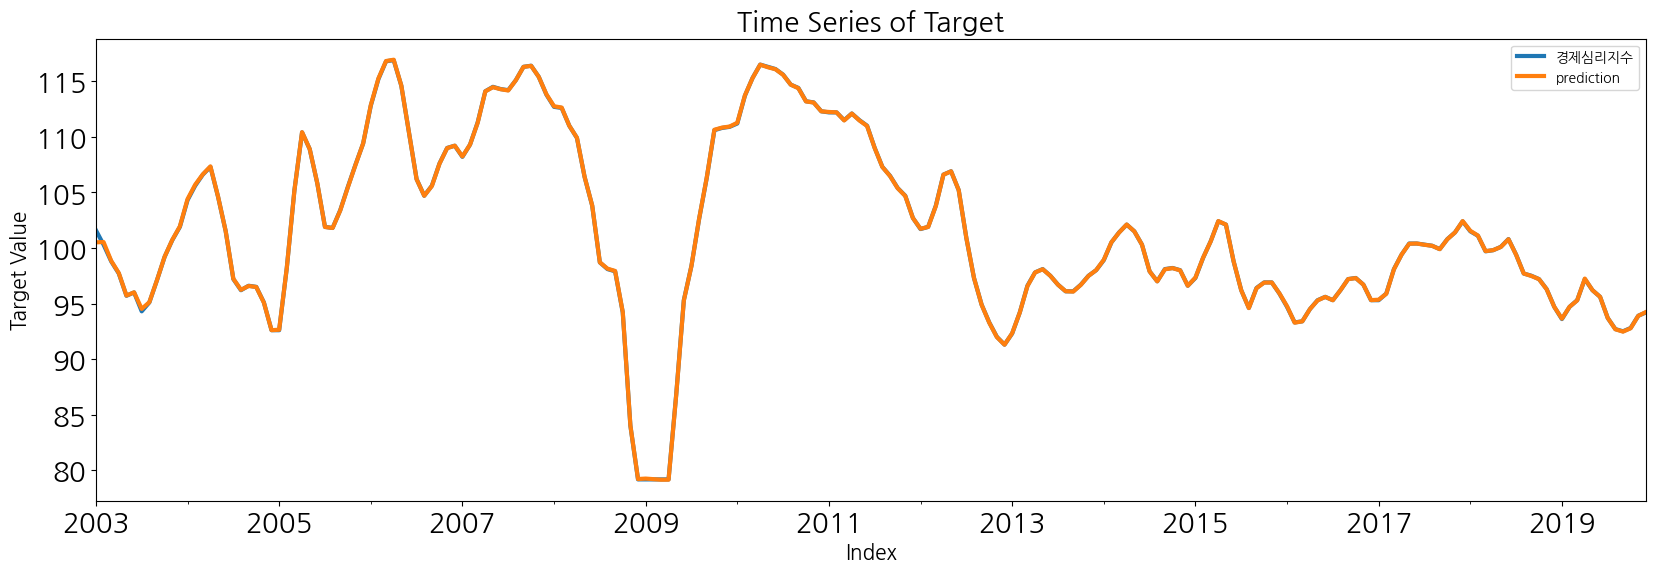

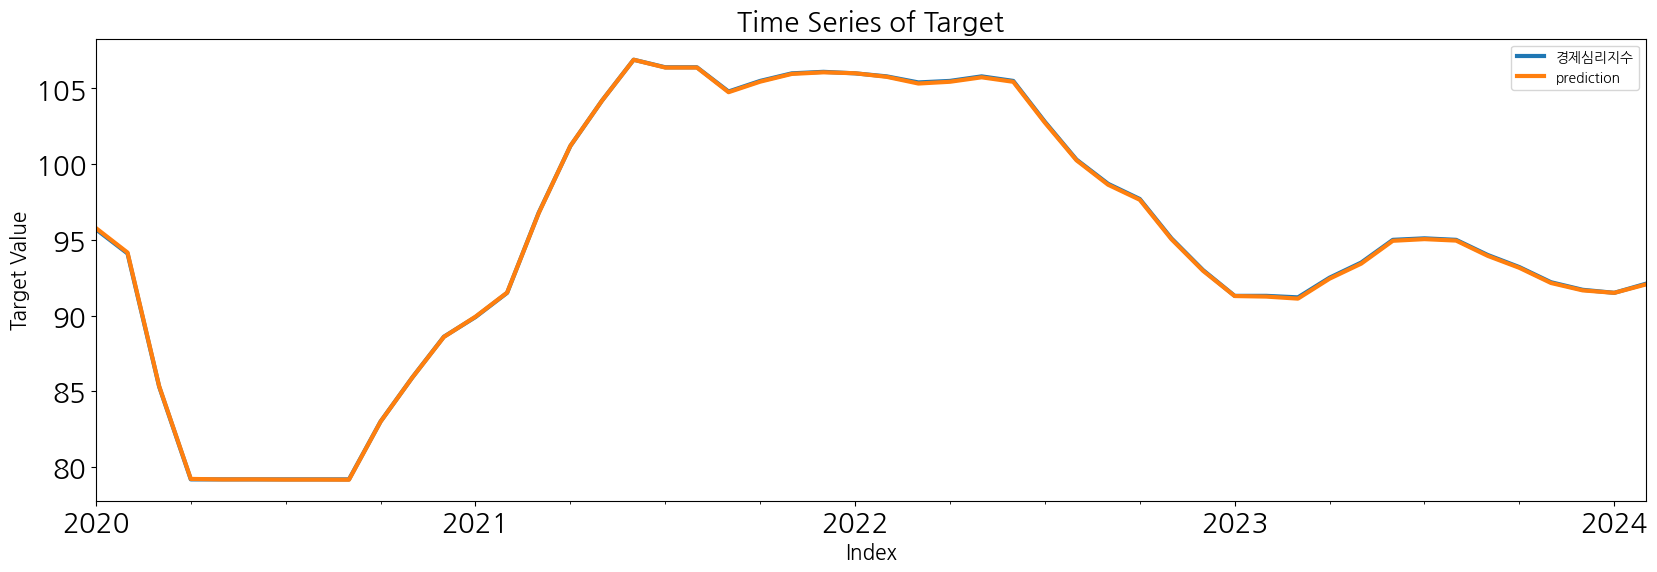

In [73]:
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(y_train, pred_tr_reg1, y_test, pred_te_reg1, graph_on=True)
print(Score_reg1)
print(Resid_tr_reg1)
print(Resid_te_reg1)

## 7. 회귀분석의 검정

In [74]:
# 선형 회귀분석의 4가지 가정
# 선형성 / 독립성 / 등분산성 / 정규성

57.60995402355411 -0.14916079608372024


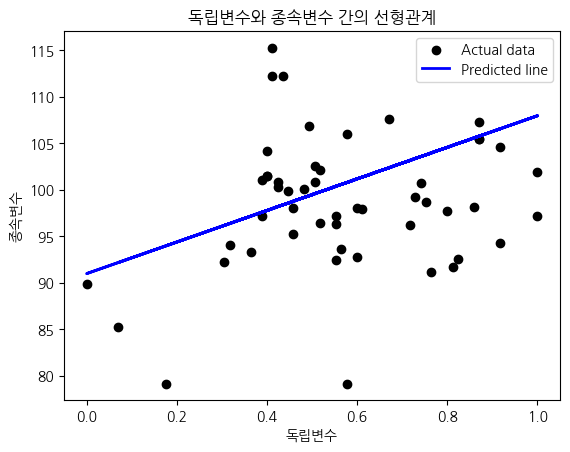

In [86]:
# 선형성
x_train1, x_test1, y_train1, y_test1 = train_test_split(raw_fe['고용률[%]'],
                                                        raw_fe['경제심리지수'],
                                                        test_size=0.2,
                                                        random_state=42)
x_train1 = x_train1.values.reshape(-1,1)
x_test1 = x_test1.values.reshape(-1,1)
model = LinearRegression()
model.fit(x_train1, y_train1)
y_pred1 = model.predict(x_test1)
mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

print(mse, r2)

plt.scatter(x_test1, y_test1, color='black', label='Actual data')
plt.plot(x_test1, y_pred1, color='blue', linewidth=2, label='Predicted line')
plt.xlabel('독립변수')
plt.ylabel('종속변수')
plt.title('독립변수와 종속변수 간의 선형관계')
plt.legend()
plt.show()

In [ ]:
# 독립성
# 1. 상관계수 행렬
corr_matrix = raw_all.drop(columns=['datetime','경제심리지수']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cbar=True, linewidth=0.5, annot=True, cmap='coolwarm')
plt.show()